# AinShamsFlow Demo

Select a dataset and a model type from below

In [ ]:
# Dataset
ds_name = 'mnist_784'
# ds_name = 'cifar_10'

# Model
model_type = 'DNN'
# model_type = 'CNN'

In [12]:
# input_image_shape: (img_shape)
if ds_name == 'mnist_784':
    if model_type == 'DNN':
        img_shape = (784,)
    else: # if model_type == 'CNN'
        img_shape = (28, 28, 1)
else: # if ds_name == 'cifar_10'
    if model_type == 'DNN':
        img_shape = (3072,)
    else: # if model_type == 'CNN'
        img_shape = (32, 32, 3)
        
# dataset split: (ds_split)
if ds_name == 'mnist_784':
    ds_split = 60000
else: # if ds_name == 'cifar_10'
    ds_split = 50000

## Imports

In [2]:
import ainshamsflow as asf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

## Fetch The Data

In [3]:
ds = fetch_openml(ds_name, version=1)
ds.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [13]:
X, y = ds["data"], ds["target"]
print('X.shape:      ', X.shape, '\t y.shape:      ', y.shape)

X_train, X_test = X[:ds_split] / 255        , X[ds_split:] / 255
y_train, y_test = y[:ds_split].astype('int'), y[ds_split:].astype('int')

if model_type == 'CNN':
    if ds_name == 'mnist_784':
        X_train = X_train.reshape(-1, *img_shape)
        X_test  = X_test.reshape(-1, *img_shape)
    else: # if ds_type == 'cifar_10'
        X_train = np.transpose(np.reshape(X_train,(-1, 3, 32,32)), (0, 2, 3, 1))
        X_test  = np.transpose(np.reshape(X_test,(-1, 3, 32,32)), (0, 2, 3, 1))

print('X_train.shape:', X_train.shape, '\t y_train.shape:', y_train.shape)
print('X_test.shape: ', X_test.shape,  '\t y_test.shape: ', y_test.shape )

X.shape:       (60000, 3072) 	 y.shape:       (60000,)
X_train.shape: (50000, 32, 32, 3) 	 y_train.shape: (50000,)
X_test.shape:  (10000, 32, 32, 3) 	 y_test.shape:  (10000,)


## Visualise the Data

In [14]:
def show_image_idx(img_idx):
    show_image(X_train[img_idx], y_train[img_idx])

def show_image(x_i, y_i=None):
    if ds_name == 'mnist_784':
        x_i = x_i.reshape((28, 28))
        plt.imshow(x_i, cmap="binary")
    else: #if ds_name == 'cifar_10'
        if model_type == 'DNN':
            x_i = np.transpose(np.reshape(x_i,(3, 32,32)), (1, 2, 0))
        plt.imshow(x_i)

    plt.axis("off")
    plt.show()

    if y_i is not None:
        if ds_name == 'mnist_784':
            print('This number is:',y_i)
        else:  #if ds_name == 'cifar_10'
            class_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
            print(class_name[y_i])

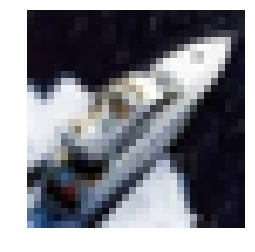

Ship


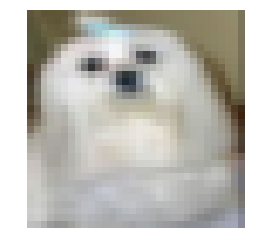

Dog


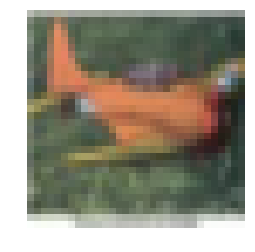

Airplane


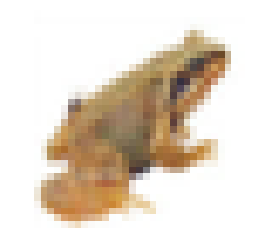

Frog


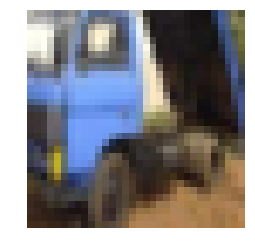

Truck


In [15]:
for idx in range(5):
    show_image_idx(idx)

## Create a Model

In [ ]:
if model_type == 'DNN':
    model = asf.models.Sequential([
        asf.layers.Dense(500, activation='relu'),
        asf.layers.Dropout(0.3),
        asf.layers.Dense(300, activation='relu'),
        asf.layers.Dropout(0.3),
        asf.layers.Dense( 10, activation='softmax')   
    ], input_shape=img_shape, name='DNN_model')
    
else: # if model_type == 'CNN'
    model = asf.models.Sequential([
        asf.layers.Conv2D( 8, kernel_size=5, padding='same', activation='relu'),
        asf.layers.Pool2D(2, mode='max'),
        asf.layers.Conv2D(16, kernel_size=3, padding='same', activation='relu'),
        asf.layers.Pool2D(2, mode='max'),
        asf.layers.Conv2D(32, kernel_size=3, padding='same', activation='relu'),
        asf.layers.Pool2D(2, mode='max'),
        asf.layers.Flatten(),
        asf.layers.Dense(100, activation='relu'),
        asf.layers.Dense( 10, activation='softmax')
    ], input_shape=img_shape, name='CNN_model')
    
model.print_summary()

In [ ]:
model.compile(
    optimizer = asf.optimizers.Adam(lr=0.001),
    loss      = asf.losses.SparceCategoricalCrossentropy(),
    metrics   = [asf.metrics.Accuracy(), asf.metrics.F1Score()]
)

## Train the Model

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs = 100,
    batch_size = 64
)

In [ ]:
history.show()

## Evaluate the Model

In [ ]:
model.evaluate(X_test, y_test)

model.evaluate(X_test, y_test)

In [ ]:
model.evaluate(X_test, y_test)